In [1]:
# Let's see if we can compute some sun altitude limits for the different constellations

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from astropy.coordinates import get_sun, get_moon, EarthLocation, AltAz
import astropy.units as u
from astropy.time import Time
from rubin_sim.utils import Site

from sat_utils import starlink_constellation_v1, Constellation, starlink_constellation_v2, oneweb_constellation

In [2]:
dt = 20./3600/24  # seconds to days

mjd0 = 60218

mjds = np.arange(mjd0, mjd0+3, dt)

site = Site("LSST")
location = EarthLocation(lat=site.latitude, lon=site.longitude, height=site.height)
t_sparse = Time(mjds, format="mjd", location=location)

sun = get_sun(t_sparse)
aa = AltAz(location=location, obstime=t_sparse)
sun_aa = sun.transform_to(aa)

In [4]:
sun_aa

<SkyCoord (AltAz: obstime=[60218.         60218.00023148 60218.00046296 ... 60220.9993056
 60220.99953708 60220.99976856], location=(1818941.18766967, -5208472.41295013, -3195142.63834984) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, AU)
    [(255.96435218, -17.08091547, 1.00140552),
     (255.91690385, -17.15071568, 1.00140551),
     (255.86941427, -17.22050136, 1.00140549), ...,
     (254.95467511, -16.43883548, 1.00055675),
     (254.90707902, -16.50831572, 1.00055673),
     (254.85944106, -16.57778034, 1.00055672)]>

In [5]:
tles = starlink_constellation_v1()
constellation = Constellation(tles)

In [6]:
sat_ras, sat_decs, sat_alts, sat_illums = constellation.paths_array(mjds)

In [7]:
sat_alts.shape

(4408, 12960)

In [8]:
mjds.shape

(12960,)

In [9]:
n_vis = np.zeros(sat_alts.shape)
n_vis[np.where((sat_alts > np.radians(20.)) & (sat_illums == True)) ] += 1

In [10]:
n_vis = np.sum(n_vis, axis=0)

Text(0, 0.5, 'N satellites visible')

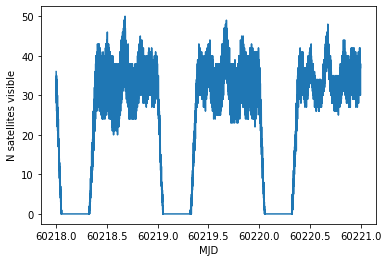

In [11]:
plt.plot(mjds, n_vis)
plt.xlabel('MJD')
plt.ylabel('N satellites visible')

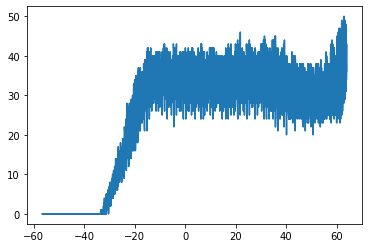

In [12]:
plt.plot(sun_aa.alt, n_vis)


In [13]:
clear = np.where(n_vis == 0)
# np.max(sun_aa.alt[clear].deg)
nc = np.where(n_vis > 0)
np.min(sun_aa.alt[nc].deg)

-33.50917822039586

In [3]:


for tle_maker in [starlink_constellation_v1, starlink_constellation_v2, oneweb_constellation]:
    tles = tle_maker()
    constellation = Constellation(tles)
    sat_ras, sat_decs, sat_alts, sat_illums = constellation.paths_array(mjds)
    n_vis = np.zeros(sat_alts.shape)
    n_vis[np.where((sat_alts > np.radians(20.)) & (sat_illums == True)) ] += 1
    n_vis = np.sum(n_vis, axis=0)
    clear = np.where(n_vis == 0)
    nc = np.where(n_vis > 0)
    
    print(tle_maker, 'min illuminated sun altitude=', np.min(sun_aa.alt[nc].deg))

<function starlink_constellation_v1 at 0x110a3d160> min illuminated sun altitude= -33.50917822039586
<function starlink_constellation_v2 at 0x110a3d1f0> min illuminated sun altitude= -34.96104492558362
<function oneweb_constellation at 0x110a3d280> min illuminated sun altitude= -50.392045983576345
